## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  70.454373   545.936952  0.517311   7.557318  291.033303
1   9.815653  1160.062236  0.450115   1.133333  522.217706
2  93.952222  1253.557736  0.057345   6.141520  118.319232
3  15.242389  1386.095590  0.229932   9.354564  318.917054
4  19.425197  1541.073573  0.539450  10.268192  831.456789


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9958883	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9833008	total: 57.6ms	remaining: 28.7s
2:	learn: 0.9735582	total: 57.9ms	remaining: 19.2s
3:	learn: 0.9630413	total: 58.4ms	remaining: 14.5s
4:	learn: 0.9490574	total: 58.9ms	remaining: 11.7s
5:	learn: 0.9373497	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9232667	total: 60ms	remaining: 8.51s
7:	learn: 0.9105892	total: 60.4ms	remaining: 7.49s
8:	learn: 0.8980888	total: 60.8ms	remaining: 6.7s
9:	learn: 0.8848680	total: 61.4ms	remaining: 6.07s
10:	learn: 0.8723679	total: 61.7ms	remaining: 5.55s
11:	learn: 0.8574913	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8458602	total: 62.7ms	remaining: 4.76s
13:	learn: 0.8324745	total: 63.1ms	remaining: 4.45s
14:	learn: 0.8198972	total: 63.5ms	remaining: 4.17s
15:	learn: 0.8094313	total: 63.9ms	remaining: 3.93s
16:	learn: 0.7998249	total: 64.5ms	remaining: 3.73s
17:	learn: 0.7902899	total: 64.9ms	remaining: 3.54s
18:	learn: 0.7815386	total: 65.6ms	remaining: 3

130:	learn: 0.2095072	total: 115ms	remaining: 763ms
131:	learn: 0.2077837	total: 116ms	remaining: 761ms
132:	learn: 0.2057829	total: 116ms	remaining: 758ms
133:	learn: 0.2039133	total: 117ms	remaining: 754ms
134:	learn: 0.2017954	total: 117ms	remaining: 750ms
135:	learn: 0.2000512	total: 118ms	remaining: 747ms
136:	learn: 0.1983440	total: 118ms	remaining: 743ms
137:	learn: 0.1963871	total: 119ms	remaining: 740ms
138:	learn: 0.1947793	total: 119ms	remaining: 737ms
139:	learn: 0.1931192	total: 120ms	remaining: 735ms
140:	learn: 0.1915495	total: 120ms	remaining: 731ms
141:	learn: 0.1898732	total: 120ms	remaining: 728ms
142:	learn: 0.1877629	total: 121ms	remaining: 725ms
143:	learn: 0.1861400	total: 121ms	remaining: 722ms
144:	learn: 0.1842427	total: 122ms	remaining: 718ms
145:	learn: 0.1820365	total: 122ms	remaining: 716ms
146:	learn: 0.1799721	total: 123ms	remaining: 712ms
147:	learn: 0.1784310	total: 123ms	remaining: 709ms
148:	learn: 0.1765656	total: 124ms	remaining: 706ms
149:	learn: 

286:	learn: 0.0590276	total: 186ms	remaining: 462ms
287:	learn: 0.0585670	total: 187ms	remaining: 461ms
288:	learn: 0.0582053	total: 187ms	remaining: 460ms
289:	learn: 0.0577979	total: 187ms	remaining: 459ms
290:	learn: 0.0573662	total: 188ms	remaining: 458ms
291:	learn: 0.0569429	total: 188ms	remaining: 456ms
292:	learn: 0.0565228	total: 189ms	remaining: 455ms
293:	learn: 0.0561152	total: 189ms	remaining: 454ms
294:	learn: 0.0556444	total: 189ms	remaining: 453ms
295:	learn: 0.0553374	total: 190ms	remaining: 451ms
296:	learn: 0.0549210	total: 190ms	remaining: 450ms
297:	learn: 0.0545329	total: 191ms	remaining: 450ms
298:	learn: 0.0542436	total: 191ms	remaining: 448ms
299:	learn: 0.0539410	total: 192ms	remaining: 447ms
300:	learn: 0.0536432	total: 192ms	remaining: 446ms
301:	learn: 0.0533273	total: 193ms	remaining: 445ms
302:	learn: 0.0530377	total: 193ms	remaining: 444ms
303:	learn: 0.0526667	total: 194ms	remaining: 443ms
304:	learn: 0.0523784	total: 194ms	remaining: 443ms
305:	learn: 

491:	learn: 0.0212438	total: 282ms	remaining: 291ms
492:	learn: 0.0211080	total: 283ms	remaining: 291ms
493:	learn: 0.0210604	total: 283ms	remaining: 290ms
494:	learn: 0.0210138	total: 284ms	remaining: 289ms
495:	learn: 0.0209682	total: 284ms	remaining: 289ms
496:	learn: 0.0209235	total: 284ms	remaining: 288ms
497:	learn: 0.0208798	total: 285ms	remaining: 287ms
498:	learn: 0.0207479	total: 285ms	remaining: 286ms
499:	learn: 0.0207051	total: 286ms	remaining: 286ms
500:	learn: 0.0206632	total: 286ms	remaining: 285ms
501:	learn: 0.0205725	total: 287ms	remaining: 285ms
502:	learn: 0.0204447	total: 287ms	remaining: 284ms
503:	learn: 0.0203560	total: 288ms	remaining: 283ms
504:	learn: 0.0202691	total: 288ms	remaining: 282ms
505:	learn: 0.0201838	total: 288ms	remaining: 281ms
506:	learn: 0.0200716	total: 289ms	remaining: 281ms
507:	learn: 0.0199891	total: 289ms	remaining: 280ms
508:	learn: 0.0198801	total: 290ms	remaining: 280ms
509:	learn: 0.0198555	total: 290ms	remaining: 279ms
510:	learn: 

647:	learn: 0.0123359	total: 353ms	remaining: 192ms
648:	learn: 0.0123053	total: 353ms	remaining: 191ms
649:	learn: 0.0122563	total: 354ms	remaining: 191ms
650:	learn: 0.0121915	total: 354ms	remaining: 190ms
651:	learn: 0.0121169	total: 355ms	remaining: 189ms
652:	learn: 0.0121093	total: 355ms	remaining: 189ms
653:	learn: 0.0120363	total: 356ms	remaining: 188ms
654:	learn: 0.0119825	total: 356ms	remaining: 188ms
655:	learn: 0.0119343	total: 357ms	remaining: 187ms
656:	learn: 0.0119047	total: 357ms	remaining: 186ms
657:	learn: 0.0118755	total: 358ms	remaining: 186ms
658:	learn: 0.0118332	total: 358ms	remaining: 185ms
659:	learn: 0.0118260	total: 359ms	remaining: 185ms
660:	learn: 0.0117973	total: 359ms	remaining: 184ms
661:	learn: 0.0117454	total: 359ms	remaining: 184ms
662:	learn: 0.0117171	total: 360ms	remaining: 183ms
663:	learn: 0.0116892	total: 360ms	remaining: 182ms
664:	learn: 0.0116194	total: 361ms	remaining: 182ms
665:	learn: 0.0115785	total: 361ms	remaining: 181ms
666:	learn: 

890:	learn: 0.0058088	total: 465ms	remaining: 56.8ms
891:	learn: 0.0057913	total: 465ms	remaining: 56.3ms
892:	learn: 0.0057641	total: 466ms	remaining: 55.8ms
893:	learn: 0.0057573	total: 466ms	remaining: 55.3ms
894:	learn: 0.0057403	total: 467ms	remaining: 54.7ms
895:	learn: 0.0057126	total: 467ms	remaining: 54.2ms
896:	learn: 0.0056960	total: 468ms	remaining: 53.7ms
897:	learn: 0.0056675	total: 468ms	remaining: 53.1ms
898:	learn: 0.0056450	total: 468ms	remaining: 52.6ms
899:	learn: 0.0056288	total: 469ms	remaining: 52.1ms
900:	learn: 0.0056025	total: 469ms	remaining: 51.6ms
901:	learn: 0.0055851	total: 470ms	remaining: 51ms
902:	learn: 0.0055689	total: 470ms	remaining: 50.5ms
903:	learn: 0.0055451	total: 471ms	remaining: 50ms
904:	learn: 0.0055222	total: 471ms	remaining: 49.5ms
905:	learn: 0.0055042	total: 472ms	remaining: 48.9ms
906:	learn: 0.0054827	total: 472ms	remaining: 48.4ms
907:	learn: 0.0054578	total: 473ms	remaining: 47.9ms
908:	learn: 0.0054410	total: 473ms	remaining: 47.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


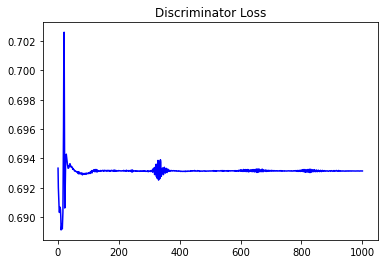

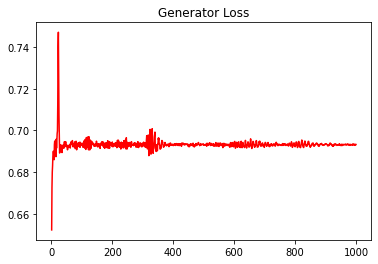

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03849930785113505


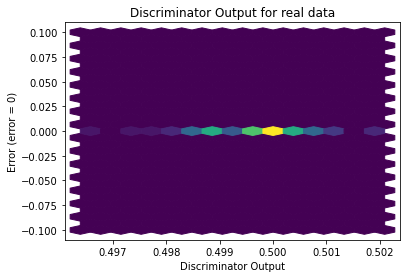

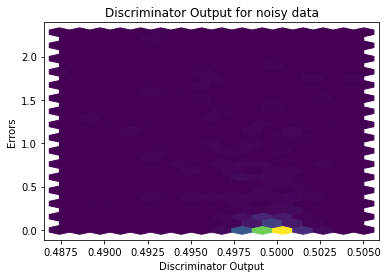

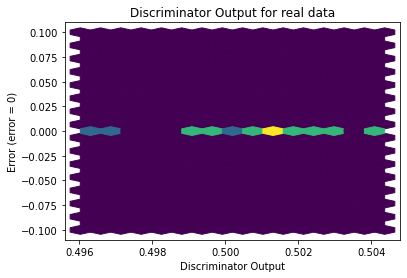

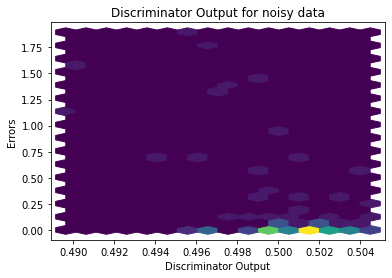

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0506]], requires_grad=True)
